<a href="https://colab.research.google.com/github/Sesideh/ClassificationAtoZ/blob/main/Udemy_with_Booking_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

**Data Loading Process**

In [2]:
# prompt: import booking_csv dataset from google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Replace 'path/to/your/booking_csv.csv' with the actual path to your file in Google Drive
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/UDEMY/booking_data.csv')

print(df.head())

                                     id  lead_time  arrival_week  duration  \
0  7e4be0a6-8ccb-4640-a758-d1944eca6a90        211             7        18   
1  4e2a0421-35df-4304-add8-30fc7de0fab3        178            31        18   
2  15dd1501-f89e-4d44-9189-412f720ebbe8        309            20        18   
3  d36f0853-9ef4-4110-b5b7-37bd1e6f200e         99            11        18   
4  fa47f667-8efc-4aea-876c-3d561668cdc2        193             2        18   

   prev_cancel  booking_changes  waiting_period  per_day_price  parking  \
0            1                1               8         179.24        0   
1           18                9              21         165.65        0   
2            0                0               7         258.12        1   
3            0                0               5         153.58        0   
4           18               10              13         113.24        0   

   special_request        segment     deposit        cust_type  is_cancelled  
0

---**Data Cleaning Process: Drop the id column, Check for duplication, check missing values, check if dataset is imbalanced, create new possible features**


---



---



In [7]:
# prompt: drop the id column

if 'id' in df.columns:
  df = df.drop('id', axis=1)
  print(df.head())
else:
  print("Column 'id' not found in the DataFrame.")

Column 'id' not found in the DataFrame.


In [6]:
total_price = df['duration'] * df['per_day_price']

df.insert(7, 'total_price', total_price)

In [8]:
# prompt: check for duplicates

if df.duplicated().any():
  df = df.drop_duplicates()
  print(df.head())
else:
  print("No duplicates found")

No duplicates found


In [9]:
# prompt: check if the dataset is imbalace or not

target_column = 'is_cancelled'

if target_column in df.columns:
  target_counts = df[target_column].value_counts()
  imbalance_ratio = target_counts.min() / target_counts.max()
  print(target_counts)
  print("Imbalance Ratio:", imbalance_ratio)

  # Check if the dataset is imbalanced based on a threshold (e.g., 70/30 split)
  if target_counts.min() / target_counts.max() < 0.3:
    print("The dataset appears to be imbalanced.")
  else:
    print("The dataset appears to be balanced.")

else:
  print(f"Column '{target_column}' not found in the DataFrame.")

is_cancelled
0    2013
1     987
Name: count, dtype: int64
Imbalance Ratio: 0.4903129657228018
The dataset appears to be balanced.


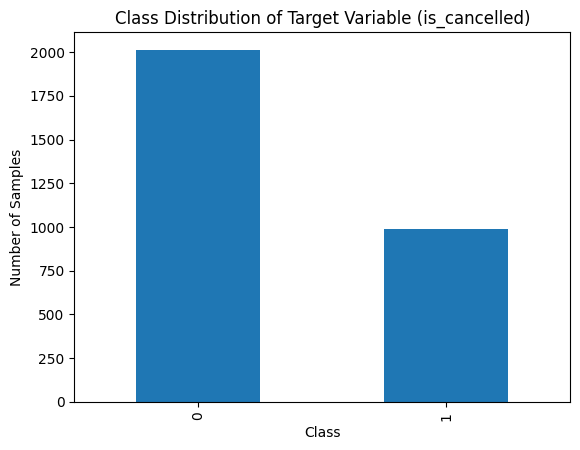

In [10]:
import matplotlib.pyplot as plt

target_counts.plot(kind='bar')
plt.title("Class Distribution of Target Variable (is_cancelled)")
plt.xlabel("Class")
plt.ylabel("Number of Samples")
plt.show()


In [11]:
class_percentages = df['is_cancelled'].value_counts(normalize=True) * 100
print(class_percentages)

is_cancelled
0    67.1
1    32.9
Name: proportion, dtype: float64


In [ ]:
#Things to do to imbalanced dataset#

#Code goes here

#

In [12]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   lead_time        3000 non-null   int64  
 1   arrival_week     3000 non-null   int64  
 2   duration         3000 non-null   int64  
 3   prev_cancel      3000 non-null   int64  
 4   booking_changes  3000 non-null   int64  
 5   waiting_period   3000 non-null   int64  
 6   per_day_price    3000 non-null   float64
 7   total_price      3000 non-null   float64
 8   parking          3000 non-null   int64  
 9   special_request  3000 non-null   int64  
 10  segment          3000 non-null   object 
 11  deposit          3000 non-null   object 
 12  cust_type        3000 non-null   object 
 13  is_cancelled     3000 non-null   int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 328.2+ KB


,0
lead_time,0
arrival_week,0
duration,0
prev_cancel,0
booking_changes,0
waiting_period,0
per_day_price,0
total_price,0
parking,0
special_request,0


**Explore Numerical values**

---



---



In [13]:
numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :\n\n', numerical)

There are 11 numerical variables

The numerical variables are :

 ['lead_time', 'arrival_week', 'duration', 'prev_cancel', 'booking_changes', 'waiting_period', 'per_day_price', 'total_price', 'parking', 'special_request', 'is_cancelled']


**Explore Categorical values**

---



---



In [14]:
categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} Categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 3 Categorical variables

The categorical variables are :

 ['segment', 'deposit', 'cust_type']


In [15]:
df[categorical].head()

,segment,deposit,cust_type
0,Offline TA/TO,No Deposit,Transient
1,Online TA,Refundable,Transient
2,Complementary,Refundable,Transient-Party
3,Complementary,Refundable,Transient-Party
4,Online TA,Refundable,Transient


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('segment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('deposit').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('cust_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['deposit'].value_counts()
    for x_label, grp in _df_3.groupby('segment')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('segment')
_ = plt.ylabel('deposit')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['cust_type'].value_counts()
    for x_label, grp in _df_4.groupby('deposit')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('deposit')
_ = plt.ylabel('cust_type')

from matplotlib import pyplot as plt
_df_5['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('segment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_7.groupby('deposit').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_8.groupby('cust_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('segment')):
  _plot_series(series, series_name, i)
  fig.legend(title='segment', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('deposit')):
  _plot_series(series, series_name, i)
  fig.legend(title='deposit', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('cust_type')):
  _plot_series(series, series_name, i)
  fig.legend(title='cust_type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_12['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['deposit'].value_counts()
    for x_label, grp in _df_13.groupby('segment')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('segment')
_ = plt.ylabel('deposit')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['cust_type'].value_counts()
    for x_label, grp in _df_14.groupby('deposit')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('deposit')
_ = plt.ylabel('cust_type')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['segment'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='index', y='segment', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_16['deposit'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_16, x='index', y='deposit', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['cust_type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='index', y='cust_type', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [16]:
for var in categorical:

    print(df[var].value_counts())

segment
Online TA        1782
Offline TA/TO     886
Complementary     180
Aviation           79
Corporate          30
Groups             26
Direct             17
Name: count, dtype: int64
deposit
Refundable    1796
No Deposit     919
Non Refund     285
Name: count, dtype: int64
cust_type
Transient          1798
Transient-Party     918
Contract            206
Group                78
Name: count, dtype: int64


In [18]:
for var in categorical:

     print(df[var].value_counts()/float(len(df)))

segment
Online TA        0.594000
Offline TA/TO    0.295333
Complementary    0.060000
Aviation         0.026333
Corporate        0.010000
Groups           0.008667
Direct           0.005667
Name: count, dtype: float64
deposit
Refundable    0.598667
No Deposit    0.306333
Non Refund    0.095000
Name: count, dtype: float64
cust_type
Transient          0.599333
Transient-Party    0.306000
Contract           0.068667
Group              0.026000
Name: count, dtype: float64


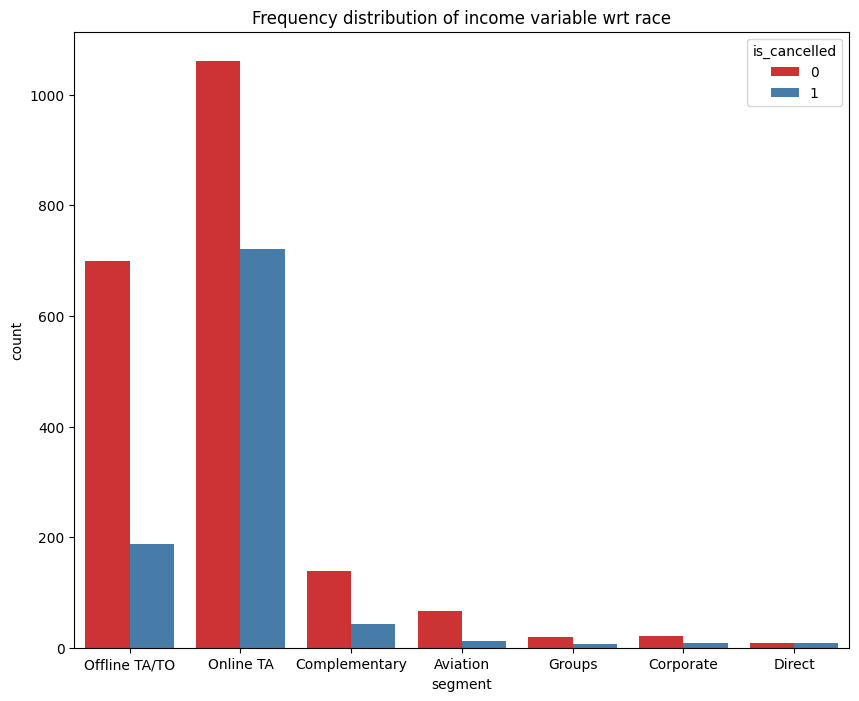

In [19]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x="segment", hue="is_cancelled", data=df, palette="Set1")
ax.set_title("Frequency distribution of segment variable wrt is_cancelled")
plt.show()

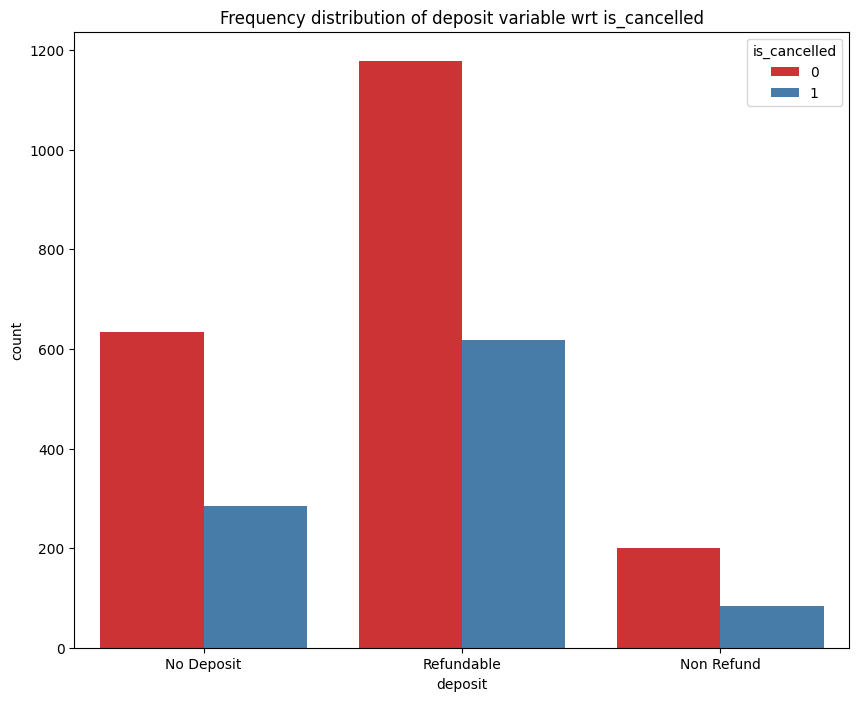

In [20]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x="deposit", hue="is_cancelled", data=df, palette="Set1")
ax.set_title("Frequency distribution of deposit variable wrt is_cancelled")
plt.show()

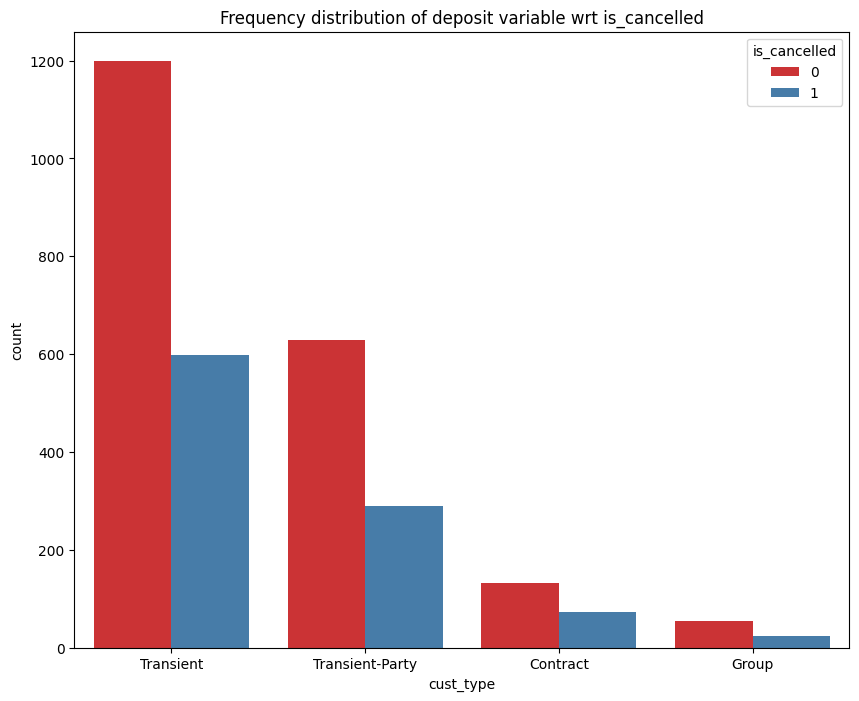

In [21]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x="cust_type", hue="is_cancelled", data=df, palette="Set1")
ax.set_title("Frequency distribution of deposit variable wrt is_cancelled")
plt.show()

**Seprating the dependent and independent variables**

---



---



In [58]:
dataset = df
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [59]:
print(X)

[[211 7 18 ... 'Offline TA/TO' 'No Deposit' 'Transient']
 [178 31 18 ... 'Online TA' 'Refundable' 'Transient']
 [309 20 18 ... 'Complementary' 'Refundable' 'Transient-Party']
 ...
 [38 47 18 ... 'Offline TA/TO' 'Refundable' 'Transient']
 [202 16 18 ... 'Complementary' 'No Deposit' 'Transient']
 [7 45 18 ... 'Offline TA/TO' 'Refundable' 'Transient']]


In [60]:
print(y)

[1 0 0 ... 0 0 0]


In [ ]:
# prompt: check for missing values

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, 1:3])
X[:, 1:3] = imputer.transform(X[:, 1:3])

In [61]:
# prompt: Encoding the categorical data

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [9,10,11])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [62]:
print(X)

[[0.0 0.0 0.0 ... 179.24 0 2]
 [0.0 0.0 0.0 ... 165.65 0 2]
 [0.0 1.0 0.0 ... 258.12 1 3]
 ...
 [0.0 0.0 0.0 ... 101.45 1 0]
 [0.0 1.0 0.0 ... 140.34 2 1]
 [0.0 0.0 0.0 ... 98.91 0 2]]


In [63]:
np.savetxt('X.csv', X, delimiter=',')

prev_cancel        0.233518
booking_changes    0.224349
lead_time          0.109244
total_price        0.102865
per_day_price      0.098807
arrival_week       0.088195
waiting_period     0.081755
special_request    0.035455
parking            0.020360
duration           0.005451
dtype: float64


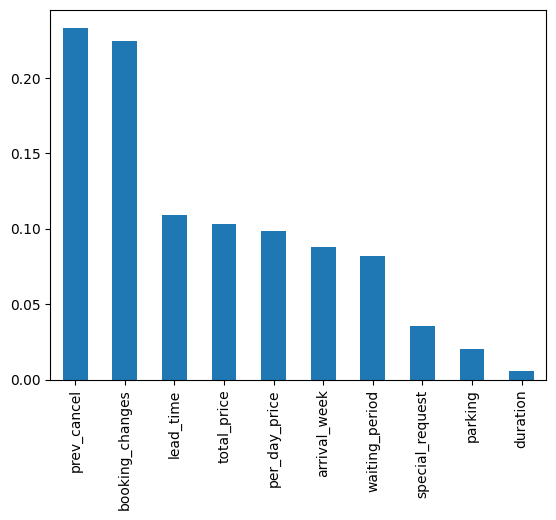

In [80]:
# Feature Importance evaluation for numerical data types

from sklearn.ensemble import RandomForestClassifier

X = df.drop(['is_cancelled','segment','deposit','cust_type'], axis=1)
y = df['is_cancelled']

model = RandomForestClassifier()
model.fit(X, y)
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feature_importances)
feature_importances.plot(kind='bar')
plt.show()

In [87]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np

model = RandomForestClassifier()
model.fit(X, y)

# Get the original feature names before one-hot encoding
original_feature_names = ['lead_time', 'arrival_week', 'duration', 'prev_cancel', 'booking_changes', 'waiting_period', 'per_day_price', 'parking', 'special_request','segment','deposit','cust_type'] # Replace with your actual column names
categorical_features = ['segment','deposit','cust_type']  # Replace with your actual categorical feature names

# Get the feature names after one-hot encoding
one_hot_feature_names = ct.get_feature_names_out(input_features=original_feature_names)

# Create the Pandas Series with the one-hot encoded feature names
feature_importances = pd.Series(model.feature_importances_, index=one_hot_feature_names).sort_values(ascending=False)

# Group importances for one-hot encoded features
grouped_importances = feature_importances.groupby(feature_importances.index.str.split('_').str[0]).sum()

# Combine grouped importances with numerical features
# Assuming the first 9 columns are your original numerical features and have the same names
all_feature_importances = pd.concat([grouped_importances, feature_importances[original_feature_names[:9]]]).sort_values(ascending=False)

print(all_feature_importances)
all_feature_importances.plot(kind='bar')
plt.show()

ValueError: Length of values (10) does not match length of index (23)